In [ ]:
from warnings import simplefilter
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pmdarima import AutoARIMA
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.model_selection import (
    ForecastingGridSearchCV,
    SlidingWindowSplitter,
    temporal_train_test_split,
)
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sktime.utils.plotting import plot_series

simplefilter("ignore", FutureWarning)
%matplotlib inline

In [ ]:
#test
y= load_airline()
file = "C:/Users/gurpr/Videos/BetaSci/Rossmann_Store1_Data_FULL.csv"
pwd = os.getcwd()
os.chdir(os.path.dirname(file))
df = pd.read_csv(os.path.basename(file), header = 0, parse_dates=True, index_col = 0, squeeze = True)
#series = pd.Series(data=['Sale'], index=file.index)
df = df.sort_index()

df.iloc[0]
plot_series(y)
plot_series(df)
#print(series.head())
#series.index=series.index.map(str)
#series.plot()

In [ ]:
y.index

In [ ]:
df.index = df.index.to_period("D")
df.index

In [ ]:
y_train, y_test = temporal_train_test_split(y, test_size=36)
plot_series(y_train, y_test, labels=["y_train", "y_test"])
#y_train.plot()
#y_test.plot()
print(y_train.shape[0], y_test.shape[0])
print(y_train.dtype)

In [ ]:
z_train, z_test = temporal_train_test_split(df, test_size=195)
plot_series(z_train, z_test, labels=["z_train", "z_test"])
print(z_train.shape[0], z_test.shape[0])
#print('train_length:',z_train.shape, '\n test_length:', z_test.shape)
z_train = z_train.astype(np.float64)
print(z_train.dtype)

In [ ]:
fh = np.arange(len(y_test)) + 1
fh

In [ ]:
fz = np.arange(len(z_test)) +1
#fz = ForecastingHorizon(z_test .index, is_relative=False)
fz

In [ ]:
# Naive using sktime
forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
print(y_pred)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
smape_loss(y_pred, y_test)

In [ ]:
forecaster = NaiveForecaster(strategy="last")
forecaster.fit(z_train)
z_pred = forecaster.predict(fz)
print(z_pred)
plot_series(z_train, z_test, z_pred, labels=["z_train", "z_test", "z_pred"])
#smape_loss(z_pred, z_test)

out = z_pred.astype(np.int)
out.round()
print(out)
out.to_csv(r'C:\Users\gurpr\Videos\BetaSci\naive_pred.csv', index=False, header=True)

In [ ]:
forecaster = ExponentialSmoothing(trend="add", seasonal="multiplicative", sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
#smape_loss(y_test, y_pred)


In [ ]:
forecaster = ExponentialSmoothing(trend="mul", seasonal="mul", sp=365)
#forecaster = ExponentialSmoothing(trend=None,
                                  #seasonal=None, sp=None)
forecaster.fit(z_train)
z_pred = forecaster.predict(fz)
#print(z_pred)
#z_pred.round()
#z_pred = z_pred.astype(np.int)
#print(z_test)
print(z_pred.shape)
plot_series(z_train, z_test, z_pred, labels=["z_train", "z_test", "z_pred"])
smape_loss(z_test, z_pred)

In [ ]:
#Save pandas series to csv file
out = z_pred.astype(np.int)
out.round()
print(out)
out.to_csv(r'C:\Users\gurpr\Videos\BetaSci\es_pred.csv', index=False, header=True)

In [ ]:
# from sktime.forecasting.ets import AutoETS
# forecaster = AutoETS(auto=True, sp=12, n_jobs=-1)
# forecaster.fit(y_train)
# y_pred = forecaster.predict(fh)
# plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
# #smape_loss(y_test, y_pred)

In [ ]:
# from sktime.forecasting.ets import AutoETS
# forecaster = AutoETS(auto=True, seasonal='mul', sp=12, n_jobs=-1)
# forecaster.fit(z_train)
# z_pred = forecaster.predict(fz)
# plot_series(z_train, z_test, z_pred, labels=["y_train", "y_test", "y_pred"])
# #smape_loss(z_test, z_pred)

In [ ]:
# forecaster = AutoARIMA(sp=1, suppress_warnings=True, )
# forecaster.fit(y_train)
# y_pred = forecaster.predict(fh)
# plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
# #smape_loss(y_test, y_pred)


0.08661468139978168

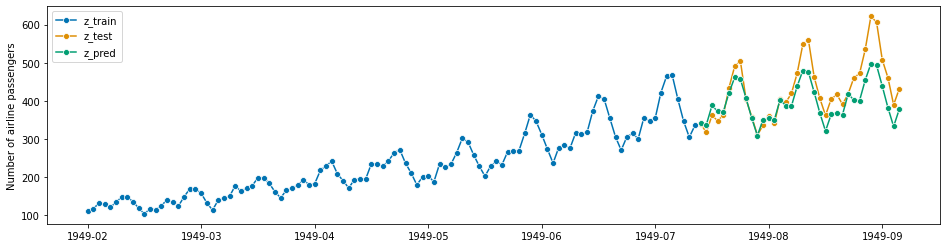

In [178]:
forecaster = ThetaForecaster(sp=12)
forecaster.fit(y_train)
alpha = 0.05  # 95% prediction intervals
y_pred, pred_ints = forecaster.predict(fh, return_pred_int=True, alpha=alpha)
plot_series(y_train, y_test, y_pred, labels=["z_train", "z_test", "z_pred"])
smape_loss(y_test, y_pred)

C:\Users\gurpr\Videos\BetaSci\venv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-198-03720a8c4201>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  out = z_pred.astype(np.int)


2014-12-06    4020.764770
2014-12-07    4539.110954
2014-12-08    4308.570466
2014-12-09    3528.297966
2014-12-10    3710.841771
                 ...     
2015-06-14    4648.637530
2015-06-15    4670.262888
2015-06-16    3978.610855
2015-06-17    5953.122649
2015-06-18    4351.997957
Freq: D, Length: 195, dtype: float64
2014-12-06    4020
2014-12-07    4539
2014-12-08    4308
2014-12-09    3528
2014-12-10    3710
              ... 
2015-06-14    4648
2015-06-15    4670
2015-06-16    3978
2015-06-17    5953
2015-06-18    4351
Freq: D, Length: 195, dtype: int32


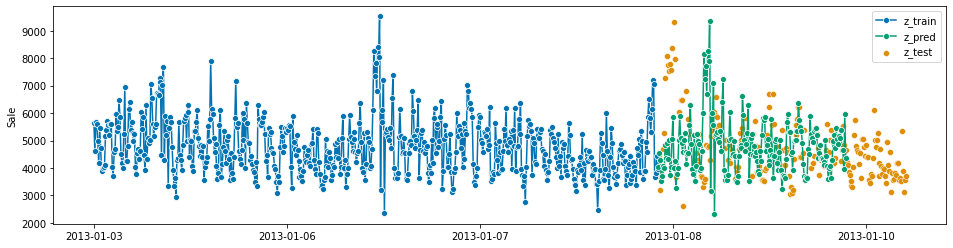

In [198]:
forecaster = ThetaForecaster(sp=230)
forecaster.fit(z_train)
alpha = 0.05  # 95% prediction intervals
z_pred, pred_ints = forecaster.predict(fz, return_pred_int=True, alpha=alpha)
plot_series(z_train, z_test, z_pred, labels=["z_train", "z_test", "z_pred"])
#smape_loss(z_test, z_pred)
print(z_pred)

out = z_pred.astype(np.int)
out.round()
print(out)
out.to_csv(r'C:\Users\gurpr\Videos\BetaSci\theta_pred.csv', index=False, header=True)


In [ ]:
fig, ax = plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    pred_ints["lower"],
    pred_ints["upper"],
    alpha=0.2,
    color=ax.get_lines()[-1].get_c(),
    label=f"{1 - alpha}% prediction intervals",
)
ax.legend();

In [ ]:
fig, ax = plot_series(z_train, z_test, z_pred, labels=["z_train", "z_test", "z_pred"])
ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    pred_ints["lower"],
    pred_ints["upper"],
    alpha=0.2,
    color=ax.get_lines()[-1].get_c(),
    label=f"{1 - alpha}% prediction intervals",
)
ax.legend();